# Feature Extraction for Credit Score Prediction
This notebook focuses on feature extraction techniques used for credit score prediction. 
The aim is to create new features that can improve the performance of machine learning models for this task.

## Table of Contents
1. [Data Preprocessing](#Data-Preprocessing)
2. [Feature Engineering](#Feature-Engineering)
3. [Summary Statistics](#Summary-Statistics)
4. [Data Export](#Data-Export)

## Data-Preprocessing

In [1]:
# Import necessary libraries for data preprocessing and analysis
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# Load the cleaned and encoded dataset
df = pd.read_csv('credit_score_clean_encoded.csv')

## Feature Engineering

In [3]:
# Calculate additional features based on existing data
df['Debt_to_Income_Ratio'] = df['Outstanding_Debt'] / (df['Monthly_Inhand_Salary'] * 12)
df['EMI_to_Income_Ratio'] = df['Total_EMI_per_month'] / df['Monthly_Inhand_Salary']
df['Investment_to_Income_Ratio'] = df['Amount_invested_monthly'] / df['Monthly_Inhand_Salary']
df['Loan_to_Income_Ratio'] = df['Outstanding_Debt'] / (df['Monthly_Inhand_Salary'] * 12)
df['Total_Financial_Obligations'] = df['Total_EMI_per_month'] + df['Amount_invested_monthly']
df['Credit_Utilization'] = df['Outstanding_Debt'] / df['Changed_Credit_Limit']
df['Net_Monthly_Savings'] = df['Monthly_Inhand_Salary'] - df['Total_Financial_Obligations']
df['Interest_Loan_Interaction'] = df['Interest_Rate'] * df['Num_of_Loan']

## Summary Statistics

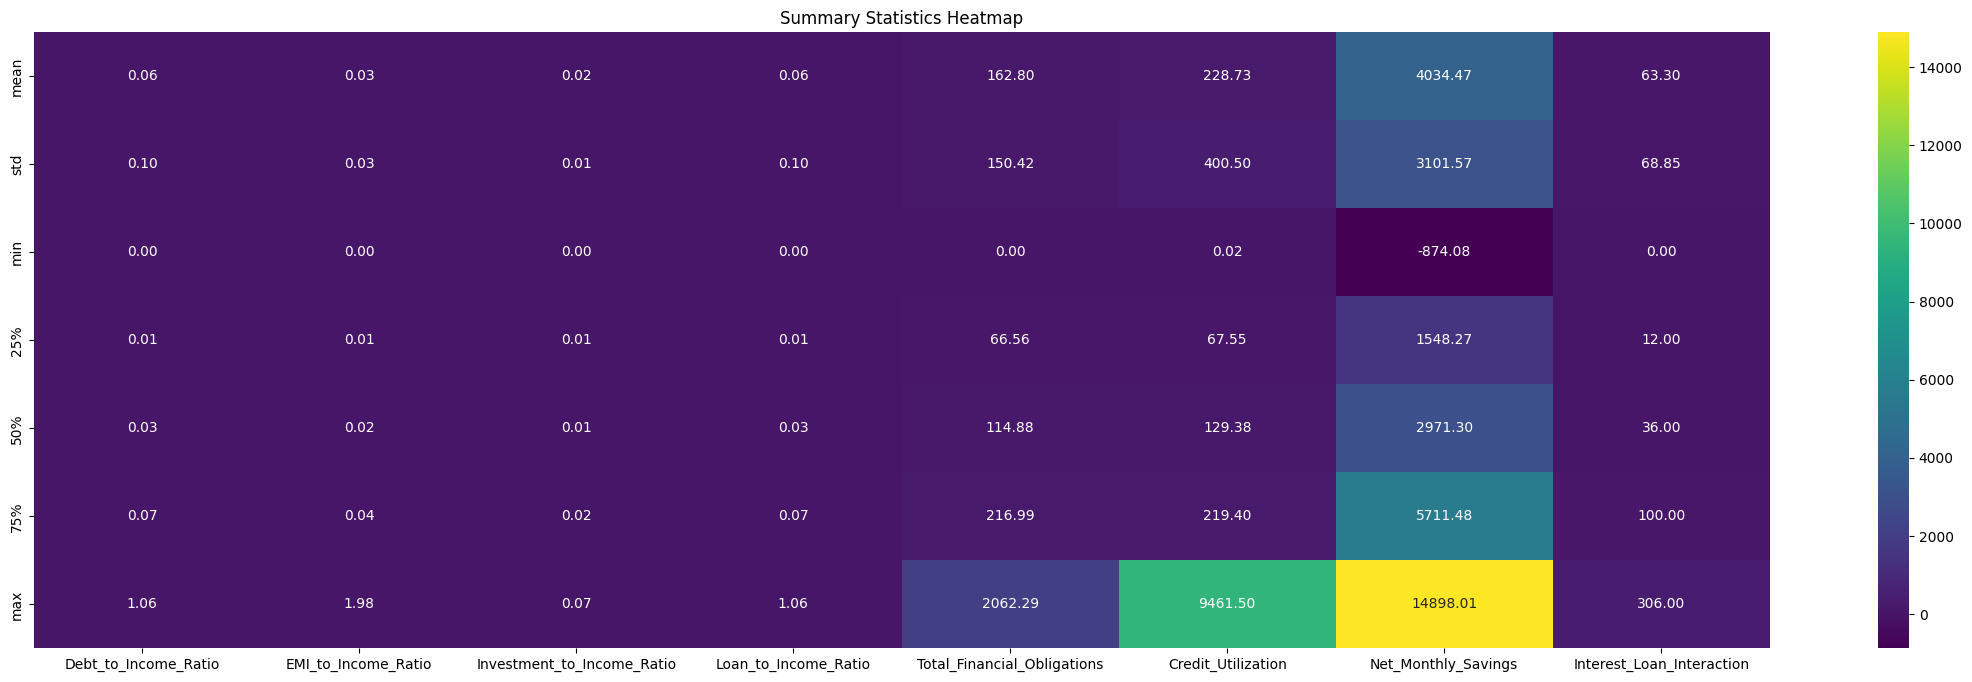

In [4]:
# Extract selected features for summary statistics
extrat = ['Debt_to_Income_Ratio', 'EMI_to_Income_Ratio', 'Investment_to_Income_Ratio', 'Loan_to_Income_Ratio',
          'Total_Financial_Obligations', "Credit_Utilization", 'Net_Monthly_Savings', 'Interest_Loan_Interaction']
dfExtraction = df[extrat]

# Calculate and visualize summary statistics
disc_extra = dfExtraction.describe().drop('count')

plt.figure(figsize=(28, 8))
sns.heatmap(data=disc_extra, annot=True, fmt=".2f", cmap="viridis")
plt.title('Summary Statistics Heatmap')
plt.xticks()
plt.show()

## Data Export

In [5]:
# Save the dataset with added features to a new CSV file
df.to_csv('credit_score_clean_extraction.csv', index=False)